1.Charger le jeu de données à l’aide de Pandas.

In [54]:
import pandas as pd

df = pd.read_csv('DataSet.csv')

# print(df.head())

2.Afficher la taille (dimensions) du dataset (lignes, colonnes).



In [55]:
print(f"Nombre de lignes : {df.shape[0]}")


print(f"Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 5735
Nombre de colonnes : 28


In [56]:


dd=df.columns.tolist()
print(dd)


['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210']


4.Créer un sous-ensemble du jeu de données contenant uniquement les colonnes suivantes :
['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI'].

In [57]:
colonnes =['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']
sous_col= df[colonnes]
print(sous_col)


       SEQN  SMQ020  RIAGENDR  RIDAGEYR  DMDEDUC2  BMXWT  BMXHT  BMXBMI
0     83732       1         1        62       5.0   94.8  184.5    27.8
1     83733       1         1        53       3.0   90.4  171.4    30.8
2     83734       1         1        78       3.0   83.4  170.1    28.8
3     83735       2         2        56       5.0  109.8  160.9    42.4
4     83736       2         2        42       4.0   55.2  164.9    20.3
...     ...     ...       ...       ...       ...    ...    ...     ...
5730  93695       1         2        76       3.0   59.1  165.8    21.5
5731  93696       2         1        26       5.0  112.1  182.2    33.8
5732  93697       1         2        80       4.0   71.7  152.2    31.0
5733  93700       1         1        35       1.0   78.2  173.3    26.0
5734  93702       2         2        24       5.0   58.3  165.0    21.4

[5735 rows x 8 columns]


5.Afficher les informations générales (.info()) sur ce sous-ensemble.

In [58]:
info_col = sous_col.info()
print(info_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
None


6.Renommer les colonnes avec des noms plus explicites :
['seqn','smoking','gender', 'age','education','weight','height','bmi'].

In [59]:
sous_col.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']
print(sous_col)

       seqn  smoking  gender  age  education  weight  height   bmi
0     83732        1       1   62        5.0    94.8   184.5  27.8
1     83733        1       1   53        3.0    90.4   171.4  30.8
2     83734        1       1   78        3.0    83.4   170.1  28.8
3     83735        2       2   56        5.0   109.8   160.9  42.4
4     83736        2       2   42        4.0    55.2   164.9  20.3
...     ...      ...     ...  ...        ...     ...     ...   ...
5730  93695        1       2   76        3.0    59.1   165.8  21.5
5731  93696        2       1   26        5.0   112.1   182.2  33.8
5732  93697        1       2   80        4.0    71.7   152.2  31.0
5733  93700        1       1   35        1.0    78.2   173.3  26.0
5734  93702        2       2   24        5.0    58.3   165.0  21.4

[5735 rows x 8 columns]


7.Vérifier la présence de doublons dans le dataset.



In [60]:
num_duplicates = sous_col.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


8.Supprimer les doublons si nécessaire.



In [61]:
sous_col = sous_col.drop_duplicates()
print("Doublons supprimés (si présents).")
print(f"Nombre de lignes après suppression : {len(sous_col)}")

Doublons supprimés (si présents).
Nombre de lignes après suppression : 5735


9.Supprimer la colonne 'seqn', considérée comme un identifiant inutile pour l’analyse.

In [62]:
sous_col = sous_col.drop(columns=['seqn'])
print(sous_col.head())

   smoking  gender  age  education  weight  height   bmi
0        1       1   62        5.0    94.8   184.5  27.8
1        1       1   53        3.0    90.4   171.4  30.8
2        1       1   78        3.0    83.4   170.1  28.8
3        2       2   56        5.0   109.8   160.9  42.4
4        2       2   42        4.0    55.2   164.9  20.3


10.Identifier les valeurs manquantes (NaN) dans les colonnes.

In [63]:
data_nul = sous_col.isna()
print(data_nul)
print(sous_col.isna().sum())

      smoking  gender    age  education  weight  height    bmi
0       False   False  False      False   False   False  False
1       False   False  False      False   False   False  False
2       False   False  False      False   False   False  False
3       False   False  False      False   False   False  False
4       False   False  False      False   False   False  False
...       ...     ...    ...        ...     ...     ...    ...
5730    False   False  False      False   False   False  False
5731    False   False  False      False   False   False  False
5732    False   False  False      False   False   False  False
5733    False   False  False      False   False   False  False
5734    False   False  False      False   False   False  False

[5735 rows x 7 columns]
smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64


11.Remplacer les valeurs manquantes :

education : remplacer par la médiane
weight, height, bmi : remplacer par la moyenne


In [64]:
sous_col['education'].fillna(sous_col['education'].median(), inplace=True)
sous_col['weight'].fillna(sous_col['weight'].mean(), inplace=True)
sous_col['height'].fillna(sous_col['height'].mean(), inplace=True)
sous_col['bmi'].fillna(sous_col['bmi'].mean(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9868\2731466283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sous_col['education'].fillna(sous_col['education'].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9868\2731466283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

verification

In [65]:
print(sous_col.isna().sum())

smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64


12.Afficher les statistiques descriptives (moyenne, écart-type, min, max, etc.) du dataset.

In [66]:
stat_Method =sous_col.describe()
print(stat_Method)

           smoking       gender          age    education       weight  \
count  5735.000000  5735.000000  5735.000000  5735.000000  5735.000000   
mean      1.607149     1.518919    48.052310     3.467132    81.342676   
std       0.571975     0.499686    18.431011     1.284826    21.633062   
min       1.000000     1.000000    18.000000     1.000000    32.400000   
25%       1.000000     1.000000    32.000000     3.000000    66.100000   
50%       2.000000     2.000000    48.000000     4.000000    78.400000   
75%       2.000000     2.000000    63.000000     4.000000    92.600000   
max       9.000000     2.000000    80.000000     9.000000   198.900000   

            height          bmi  
count  5735.000000  5735.000000  
mean    166.142834    29.382197  
std      10.024624     7.050607  
min     129.700000    14.500000  
25%     158.750000    24.400000  
50%     166.142834    28.400000  
75%     173.400000    33.000000  
max     202.700000    67.300000  


13.Détecter les valeurs aberrantes (outliers) à l’aide de méthodes statistiques.

In [67]:
# Détection des outliers avec la méthode de l'IQR pour chaque colonne numérique
for col in ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']:
    Q1 = sous_col[col].quantile(0.25)
    Q3 = sous_col[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = sous_col[(sous_col[col] < (Q1 - 1.5 * IQR)) | (sous_col[col] > (Q3 + 1.5 * IQR))]
    print(f"Colonne : {col}")
    print(f"Nombre d'outliers : {outliers.shape[0]}")
    print("-" * 30)


Colonne : smoking
Nombre d'outliers : 10
------------------------------
Colonne : gender
Nombre d'outliers : 0
------------------------------
Colonne : age
Nombre d'outliers : 0
------------------------------
Colonne : education
Nombre d'outliers : 658
------------------------------
Colonne : weight
Nombre d'outliers : 164
------------------------------
Colonne : height
Nombre d'outliers : 7
------------------------------
Colonne : bmi
Nombre d'outliers : 163
------------------------------


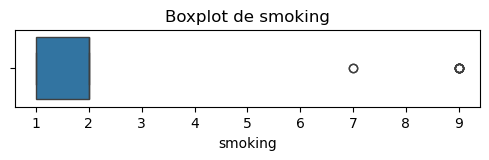

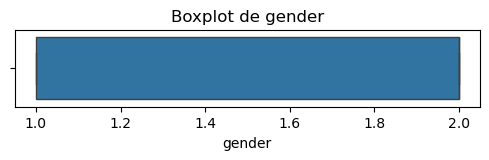

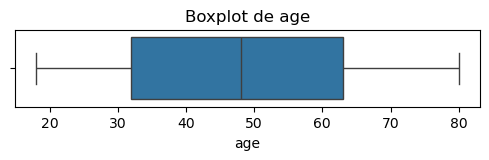

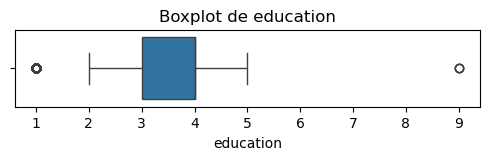

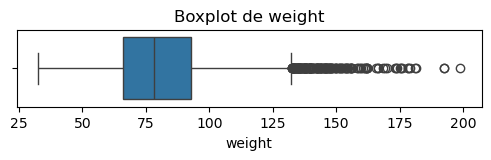

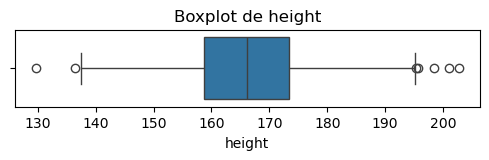

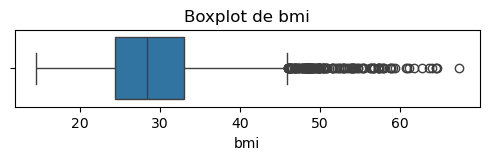

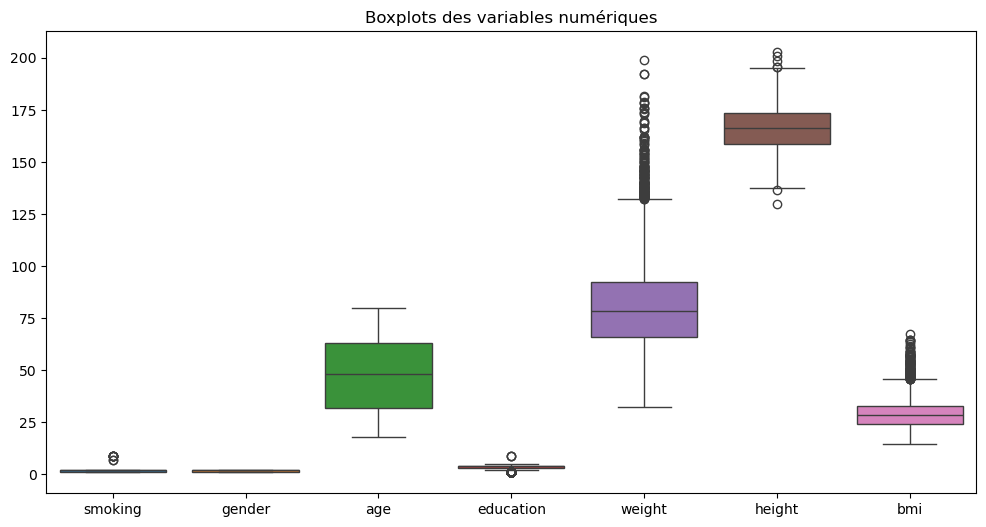

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
colonnes = ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']

for col in colonnes:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=sous_col[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sous_col)
plt.title('Boxplots des variables numériques')
plt.show()

14.Supprimer les outliers pour améliorer la qualité des données.

In [ ]:
df_sans_outliers = sous_col.copy()

colonnes = ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']

for col in colonnes:
    Q1 = df_sans_outliers[col].quantile(0.25)
    Q3 = df_sans_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    df_sans_outliers = df_sans_outliers[(df_sans_outliers[col] >= borne_inf) & (df_sans_outliers[col] <= borne_sup)]


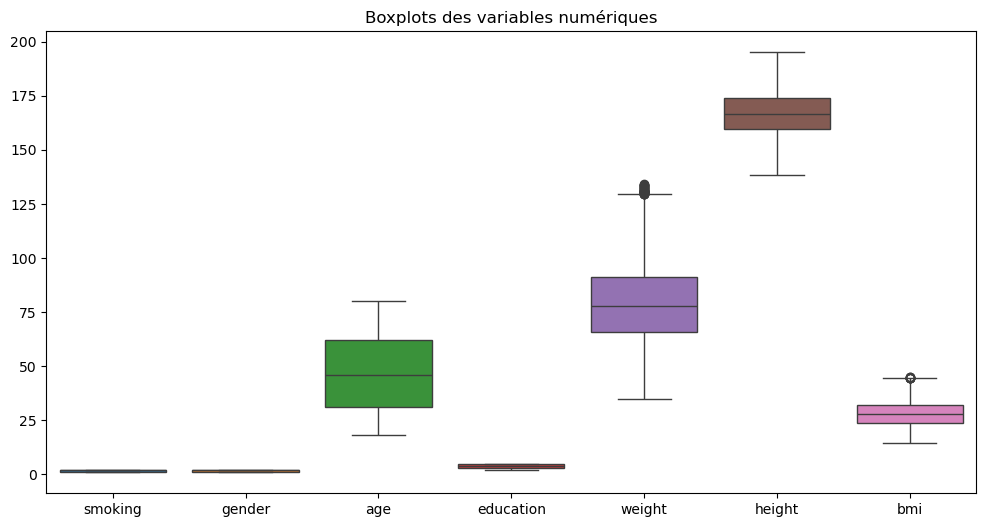

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
colonnes = ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sans_outliers)
plt.title('Boxplots des variables numériques')
plt.show()

In [74]:
for col in ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']:
    Q1 = df_sans_outliers[col].quantile(0.25)
    Q3 = df_sans_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_sans_outliers[(df_sans_outliers[col] < (Q1 - 1.5 * IQR)) | (df_sans_outliers[col] > (Q3 + 1.5 * IQR))]
    print(f"Colonne : {col}")
    print(f"Nombre d'outliers : {outliers.shape[0]}")
    print("-" * 30)


Colonne : smoking
Nombre d'outliers : 0
------------------------------
Colonne : gender
Nombre d'outliers : 0
------------------------------
Colonne : age
Nombre d'outliers : 0
------------------------------
Colonne : education
Nombre d'outliers : 0
------------------------------
Colonne : weight
Nombre d'outliers : 28
------------------------------
Colonne : height
Nombre d'outliers : 0
------------------------------
Colonne : bmi
Nombre d'outliers : 8
------------------------------


Remplacer les codes numériques par des labels explicites dans trois colonnes :

smoking : {1: 'yes', 2: 'no', 7: nan, 8: nan}

gender : {1: 'male', 2: 'female'}

education :
  {    1: '<9th grade', 2: '9-11th grade', 3: 'HS or GED', 4: 'Some college / AA', 5: 'College or above', 7: 'Other', 8: 'Other'}

In [87]:
import numpy as np

smoking_map = {1: 'yes', 2: 'no', 7: np.nan, 8: np.nan}
gender_map = {1: 'male', 2: 'female'}
education_map = {
    1: '<9th grade',
    2: '9-11th grade',
    3: 'HS or GED',
    4: 'Some college / AA',
    5: 'College or above',
    7: 'Other',
    8: 'Other'
}

df_sans_outliers['smoking'] = df_sans_outliers['smoking'].replace(smoking_map)
df_sans_outliers['gender'] = df_sans_outliers['gender'].replace(gender_map)
df_sans_outliers['education'] = df_sans_outliers['education'].replace(education_map)



print data

In [86]:
printtst=df_sans_outliers.head(30)
print(printtst)

   smoking  gender  age          education  weight  height   bmi
0      yes    male   62   College or above    94.8   184.5  27.8
1      yes    male   53          HS or GED    90.4   171.4  30.8
2      yes    male   78          HS or GED    83.4   170.1  28.8
3       no  female   56   College or above   109.8   160.9  42.4
4       no  female   42  Some college / AA    55.2   164.9  20.3
5       no  female   72       9-11th grade    64.4   150.0  28.6
6      yes    male   22  Some college / AA    76.6   165.4  28.0
7       no  female   32  Some college / AA    64.5   151.3  28.2
8       no    male   18  Some college / AA    72.4   166.1  26.2
9       no    male   56          HS or GED   108.3   179.4  33.6
10     yes    male   46   College or above    86.2   176.7  27.6
11     yes    male   45       9-11th grade    76.2   177.8  24.1
12     yes  female   30  Some college / AA    71.2   163.6  26.6
13      no  female   67   College or above   117.8   164.1  43.7
14      no    male   67  

16-1.Analyser les relations entre variables :
    -Utiliser Seaborn Pairplot pour visualiser les relations entre toutes les variables.
    -Créer des graphiques individuels pour observer la distribution ou la corrélation de chaque attribut.
16-2.Sauvegarder le dataset nettoyé au format CSV (ou autre)

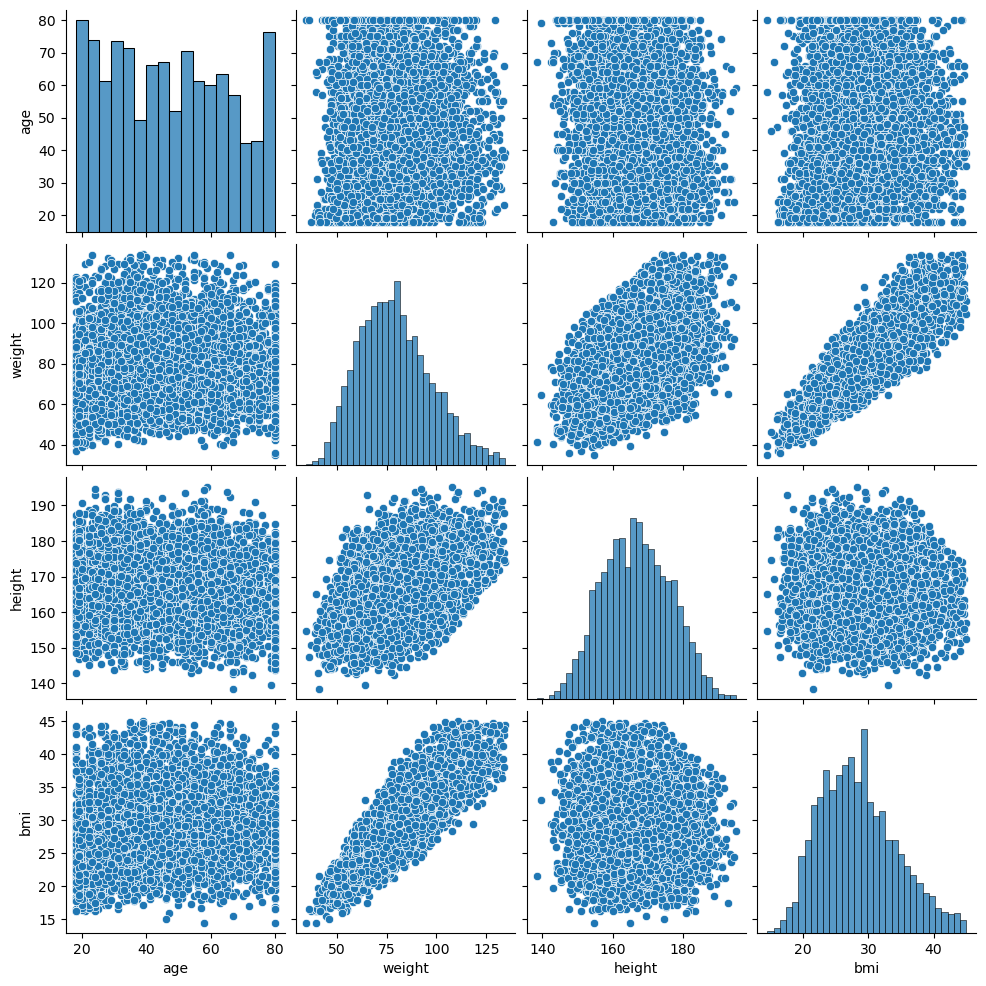

In [88]:
sns.pairplot(df_sans_outliers.dropna())
plt.show()

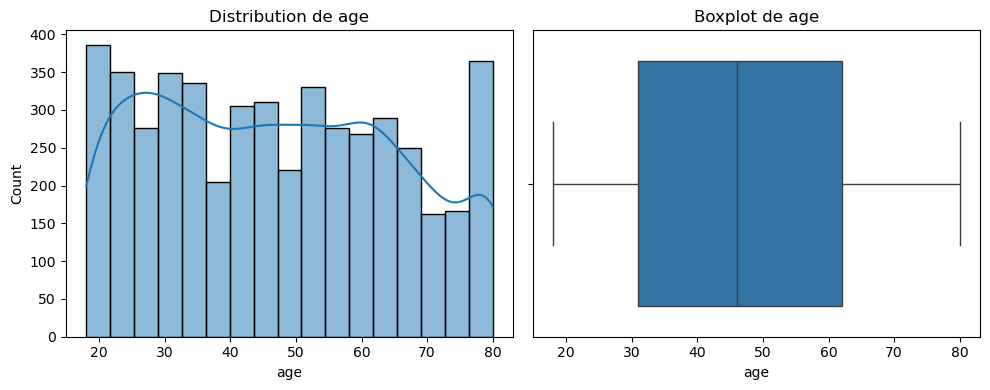

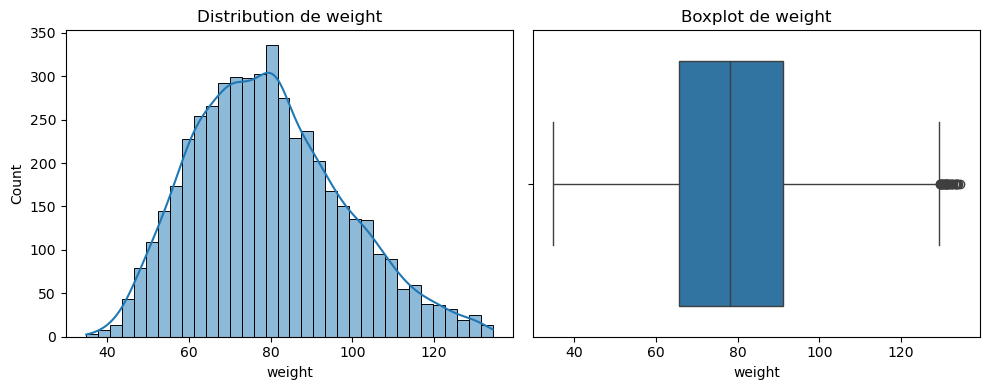

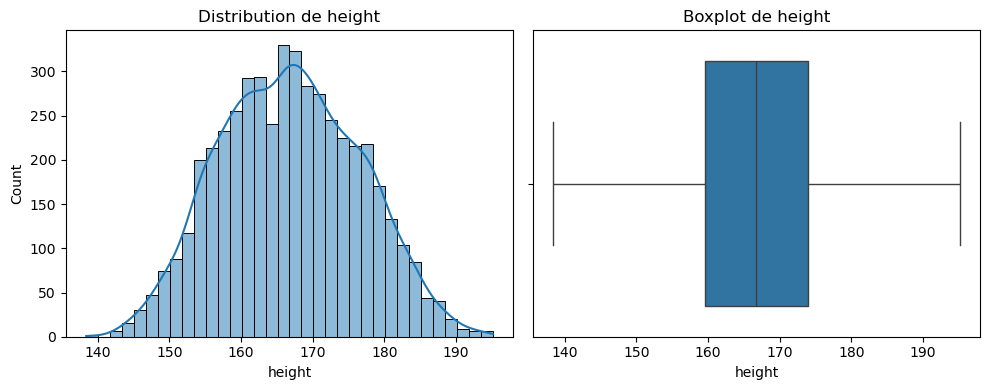

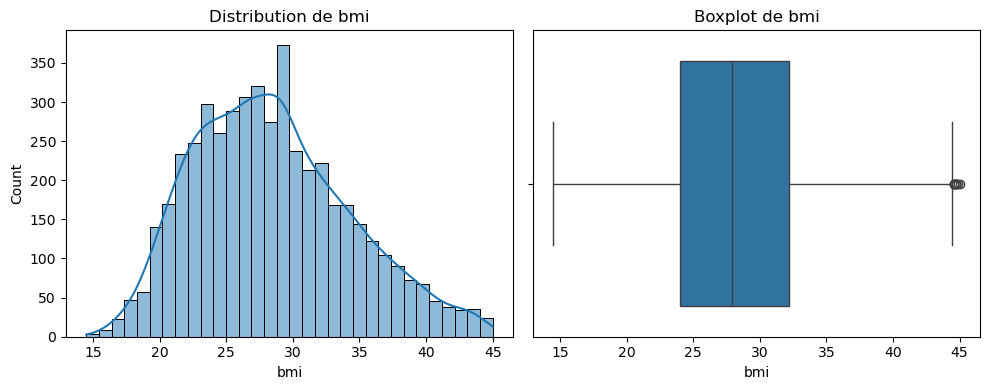

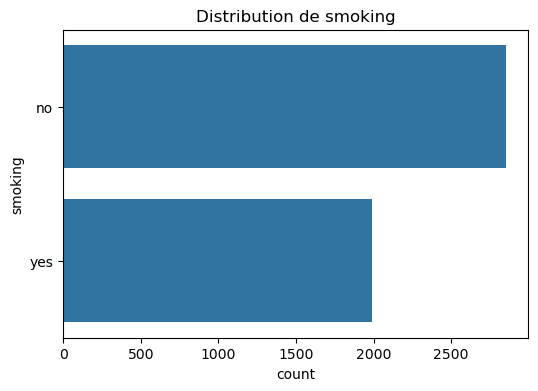

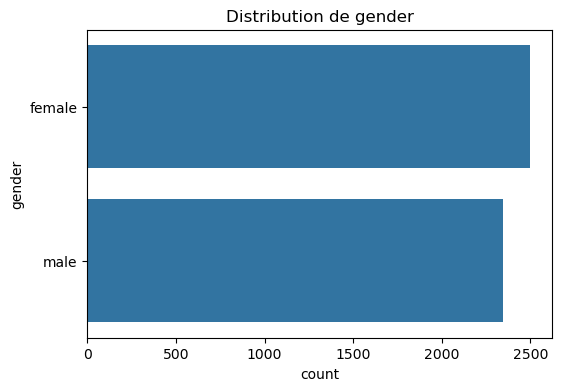

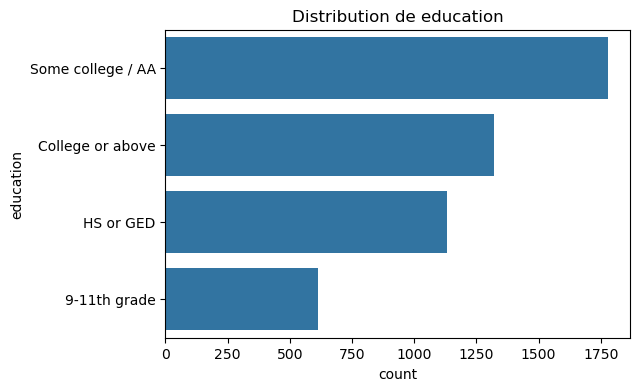

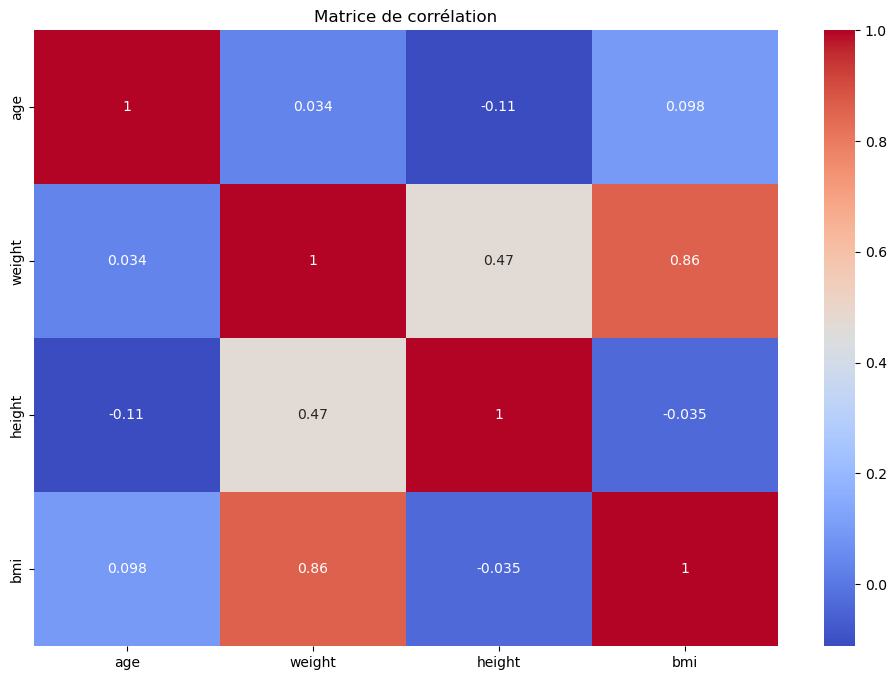

In [95]:


# Distribution de chaque attribut numérique
for col in df_sans_outliers.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_sans_outliers[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_sans_outliers[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

# Distribution de chaque attribut catégoriel
for col in df_sans_outliers.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=df_sans_outliers[col], order=df_sans_outliers[col].value_counts().index)
    plt.title(f'Distribution de {col}')
    plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df_sans_outliers.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


16-2.Sauvegarder le dataset nettoyé au format CSV (ou autre)


In [96]:
df_sans_outliers.to_csv('data_final.csv' , index=False)